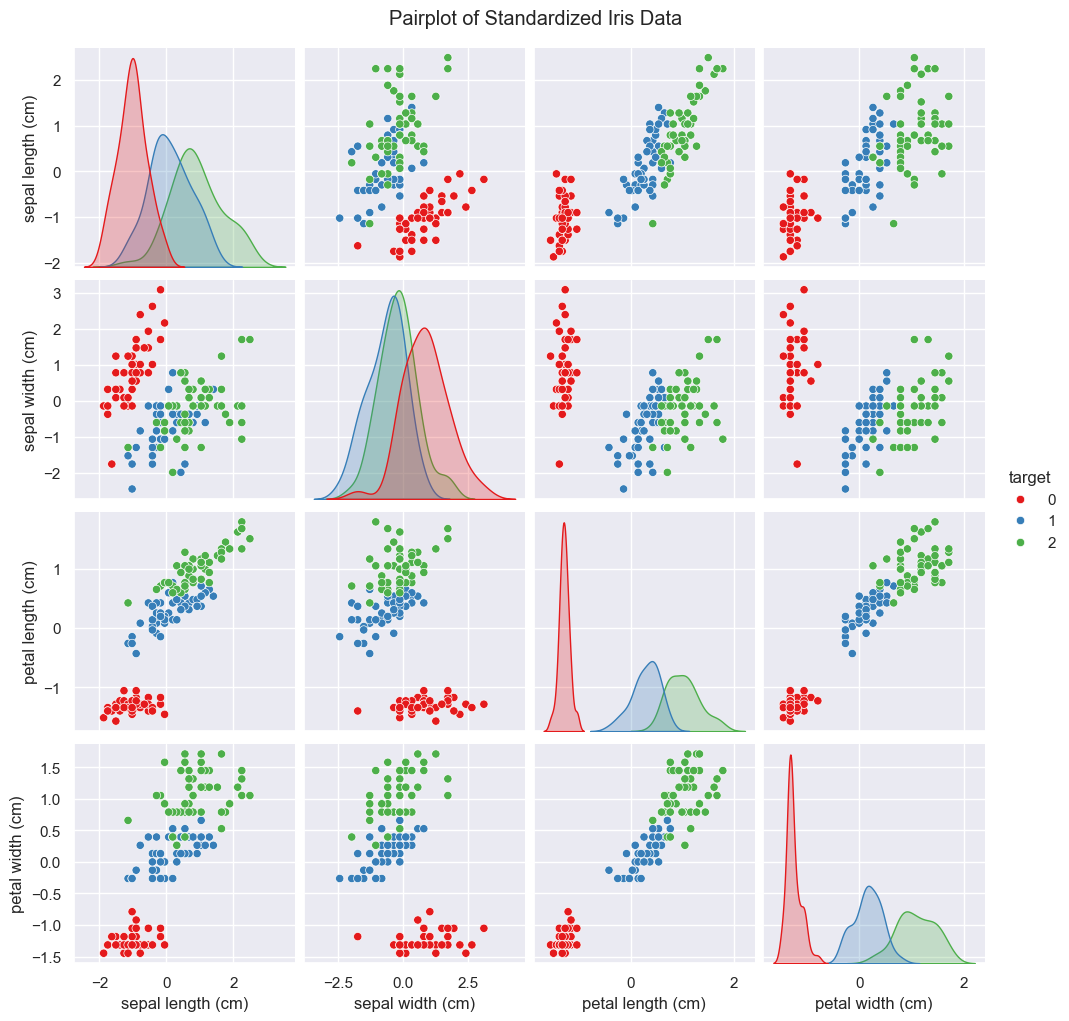

Explained Variance Ratio for each Principal Component:
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%
PC4: 0.52%


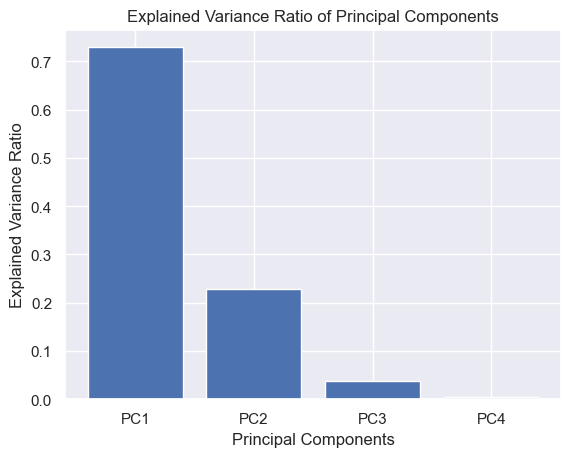

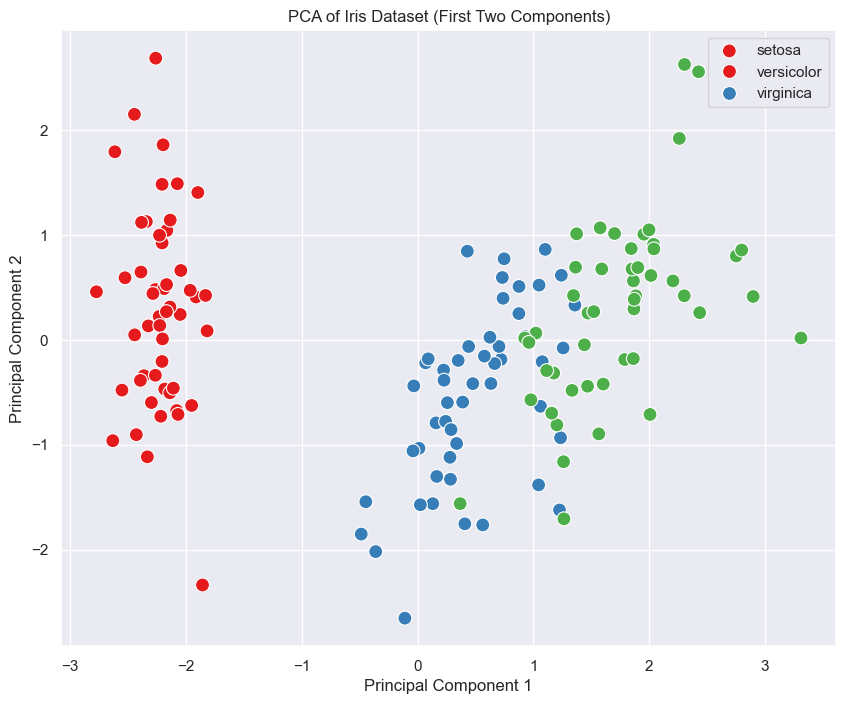

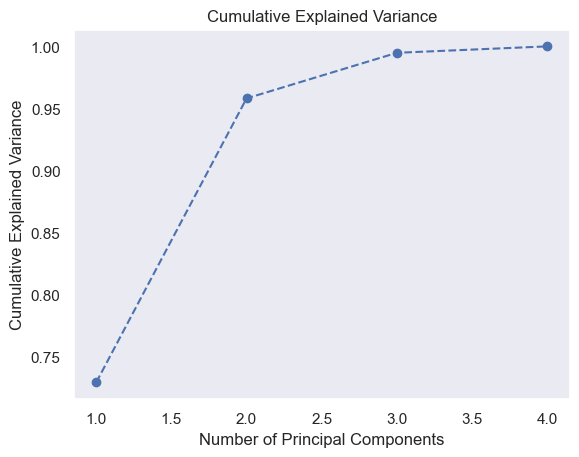

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd


sns.set_theme()


data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


df = pd.DataFrame(X_scaled, columns=feature_names)
df['target'] = y


sns.pairplot(df, hue="target", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot of Standardized Iris Data", y=1.02)
plt.show()


pca = PCA(n_components=4)  
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
for i, var_ratio in enumerate(explained_variance, 1):
    print(f"PC{i}: {var_ratio:.2%}")


plt.bar(range(1, len(explained_variance) + 1), explained_variance, tick_label=[f'PC{i}' for i in range(1, len(explained_variance) + 1)])
plt.title("Explained Variance Ratio of Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()


X_pca_2d = X_pca[:, :2]
pca_df = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
pca_df['target'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="target", palette="Set1", s=100)
plt.title("PCA of Iris Dataset (First Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(labels=target_names)
plt.show()


cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()
